In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

In [84]:
history_data = pd.read_csv('history.csv')
history_data.head()

,Yr,Lg,Series,Unnamed: 3,Unnamed: 4,Winning Team,W,Unnamed: 7,Losing Team,W.1,Unnamed: 10,Favorite,Underdog
0,2025,NBA,Eastern Conf First Round,Apr 20 - Apr 28 2025,NaN,Cleveland Cavaliers (1),4,NaN,Miami Heat (8),0,NaN,NaN,NaN
1,2025,NBA,Eastern Conf First Round,Apr 19 - Apr 29 2025,NaN,Indiana Pacers (4),4,NaN,Milwaukee Bucks (5),1,NaN,NaN,NaN
2,2025,NBA,Eastern Conf First Round,Apr 19 - May 1 2025,NaN,New York Knicks (3),4,NaN,Detroit Pistons (6),2,NaN,NaN,NaN
3,2025,NBA,Eastern Conf First Round,Apr 20 - Apr 29 2025,NaN,Boston Celtics (2),4,NaN,Orlando Magic (7),1,NaN,NaN,NaN
4,2025,NBA,Western Conf First Round,Apr 20 - Apr 26 2025,NaN,Oklahoma City Thunder (1),4,NaN,Memphis Grizzlies (8),0,NaN,NaN,NaN


In [85]:
history_data['Winning_Seed'] = history_data['Winning Team'].str.extract(r'\((\d+)\)').astype(float)
history_data['Losing_Seed'] = history_data['Losing Team'].str.extract(r'\((\d+)\)').astype(float)
history_data = history_data.dropna(subset=['Winning_Seed', 'Losing_Seed'])

# Group by year and aggregate the winning and losing seeds
seeds_head_to_head = history_data.groupby('Yr').apply(lambda x: [(row['Winning_Seed'], row['Losing_Seed']) for _, row in x.iterrows()]).to_dict()
# Convert float seeds to integers in the seeds_head_to_head dictionary
seeds_head_to_head = {year: [(int(win_seed), int(lose_seed)) for win_seed, lose_seed in matchups] 
                     for year, matchups in seeds_head_to_head.items()}
seeds_head_to_head

/var/folders/q2/d254wk4j7hb9kjgds8n953qr0000gn/T/ipykernel_10658/4184195852.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seeds_head_to_head = history_data.groupby('Yr').apply(lambda x: [(row['Winning_Seed'], row['Losing_Seed']) for _, row in x.iterrows()]).to_dict()


{1984: [(1, 8),
  (2, 7),
  (6, 3),
  (5, 4),
  (4, 5),
  (1, 8),
  (6, 3),
  (2, 7),
  (1, 5),
  (2, 6),
  (1, 4),
  (6, 2),
  (1, 2),
  (1, 6),
  (1, 1)],
 1985: [(1, 8),
  (4, 5),
  (2, 7),
  (3, 6),
  (2, 7),
  (1, 8),
  (5, 4),
  (6, 3),
  (1, 4),
  (3, 2),
  (2, 6),
  (1, 5),
  (1, 3),
  (1, 2),
  (1, 1)],
 1986: [(4, 5),
  (1, 8),
  (2, 7),
  (3, 6),
  (4, 5),
  (3, 6),
  (2, 7),
  (1, 8),
  (1, 4),
  (2, 3),
  (2, 3),
  (1, 4),
  (1, 2),
  (2, 1),
  (1, 2)],
 1987: [(2, 7),
  (1, 8),
  (3, 6),
  (4, 5),
  (5, 4),
  (6, 3),
  (1, 8),
  (7, 2),
  (1, 4),
  (3, 2),
  (1, 5),
  (7, 6),
  (1, 3),
  (1, 7),
  (1, 1)],
 1988: [(4, 5),
  (1, 8),
  (3, 6),
  (2, 7),
  (3, 6),
  (2, 7),
  (1, 8),
  (5, 4),
  (1, 4),
  (2, 3),
  (3, 2),
  (1, 5),
  (2, 1),
  (1, 3),
  (1, 2)],
 1989: [(6, 3),
  (1, 8),
  (5, 4),
  (2, 7),
  (7, 2),
  (1, 8),
  (3, 6),
  (4, 5),
  (6, 2),
  (1, 5),
  (1, 4),
  (3, 7),
  (1, 6),
  (1, 3),
  (1, 1)],
 1990: [(3, 6),
  (1, 8),
  (5, 4),
  (2, 7),
  (1, 8),
  

In [86]:
# Extract all matchups involving seed 8
seed_8_matchups = []
for year, matchups in seeds_head_to_head.items():
    for matchup in matchups:
        if 8 in matchup:
            seed_8_matchups.append((year, matchup))

# Print all matchups involving seed 8
print("All matchups involving seed 8:")
for year, matchup in seed_8_matchups:
    print(f"Year {year}: Seed {matchup[0]} vs Seed {matchup[1]}")

# Count wins and losses for seed 8
seed_8_wins = sum(1 for _, matchup in seed_8_matchups if matchup[0] == 8)
seed_8_losses = sum(1 for _, matchup in seed_8_matchups if matchup[1] == 8)

print(f"\nSeed 8 record: {seed_8_wins} wins, {seed_8_losses} losses")
print(f"Win percentage: {seed_8_wins/(seed_8_wins+seed_8_losses):.2f}")


All matchups involving seed 8:
Year 1984: Seed 1 vs Seed 8
Year 1984: Seed 1 vs Seed 8
Year 1985: Seed 1 vs Seed 8
Year 1985: Seed 1 vs Seed 8
Year 1986: Seed 1 vs Seed 8
Year 1986: Seed 1 vs Seed 8
Year 1987: Seed 1 vs Seed 8
Year 1987: Seed 1 vs Seed 8
Year 1988: Seed 1 vs Seed 8
Year 1988: Seed 1 vs Seed 8
Year 1989: Seed 1 vs Seed 8
Year 1989: Seed 1 vs Seed 8
Year 1990: Seed 1 vs Seed 8
Year 1990: Seed 1 vs Seed 8
Year 1991: Seed 1 vs Seed 8
Year 1991: Seed 1 vs Seed 8
Year 1992: Seed 1 vs Seed 8
Year 1992: Seed 1 vs Seed 8
Year 1993: Seed 1 vs Seed 8
Year 1993: Seed 1 vs Seed 8
Year 1994: Seed 1 vs Seed 8
Year 1994: Seed 8 vs Seed 1
Year 1994: Seed 5 vs Seed 8
Year 1995: Seed 1 vs Seed 8
Year 1995: Seed 1 vs Seed 8
Year 1996: Seed 1 vs Seed 8
Year 1996: Seed 1 vs Seed 8
Year 1997: Seed 1 vs Seed 8
Year 1997: Seed 1 vs Seed 8
Year 1998: Seed 1 vs Seed 8
Year 1998: Seed 1 vs Seed 8
Year 1999: Seed 8 vs Seed 1
Year 1999: Seed 1 vs Seed 8
Year 1999: Seed 8 vs Seed 4
Year 1999: Seed 8

In [87]:
series_probs = np.zeros((9, 9)) # series_probs[i, j] = P(seed i beats seed j), 1-indexed: 1 through 8
counts = defaultdict(int)       # counts[(i, j)] = number of times seed i plays seed j
for year, seed_results in seeds_head_to_head.items():
    for (i, j) in seed_results:
        series_probs[i, j] += 1
        if i > j:
            counts[(j, i)] += 1
        else: # i < j
            counts[(i, j)] += 1

for team_pair, games in counts.items():
    i, j = team_pair
    if i != j:
        series_probs[i, j] /= games
        series_probs[j, i] /= games
        assert series_probs[i, j] + series_probs[j, i] == 1

for i in range(1, 9):
    series_probs[i, i] = 0.5

In [88]:
series_probs[8]

array([0.        , 0.06976744, 1.        , 0.        , 0.25      ,
       0.5       , 0.        , 0.        , 0.5       ])

In [89]:
# Apply smoothing to the series_probs matrix to handle low sample size issues
smoothed_probs = series_probs.copy()

# Define a smoothing function based on seed difference
def smoothing_function(seed_i, seed_j, original_prob):
    # Calculate seed difference (absolute value)
    seed_diff = abs(seed_i - seed_j)
    
    # Prior probability based on seed difference
    if seed_i < seed_j: 
        # Stronger bias favoring higher seeds
        prior_prob = 0.65 + 0.05 * seed_diff  
    else: 
        # Lower seeds rarely upset higher seeds
        prior_prob = 0.35 - 0.05 * seed_diff  
    
    # Cap the prior probability between 0.05 and 0.95
    prior_prob = max(0.05, min(0.95, prior_prob))
    
    # Weight for original data - increases with more observations
    if seed_i > seed_j:
        weight = counts.get((seed_j, seed_i), 0)
    else:
        weight = counts.get((seed_i, seed_j), 0)
    
    # Calculate the weight factor (more observations = more weight to original data)
    base_observations = 5 + seed_diff  # More observations needed for bigger seed differences
    alpha = min(1.0, weight / base_observations)
    
    # Weighted average of original probability and prior
    return alpha * original_prob + (1 - alpha) * prior_prob

# ignore first row/column
for i in range(1, 9):
    for j in range(1, 9):
        if i != j:  
            smoothed_probs[i, j] = smoothing_function(i, j, series_probs[i, j])
            if i < j:  # Only process each pair once
                smoothed_probs[j, i] = 1 - smoothed_probs[i, j]

print("Original probability for seed 8:")
print(series_probs[8])
print("\nSmoothed probability for seed 8:")
print(smoothed_probs[8])

Original probability for seed 8:
[0.         0.06976744 1.         0.         0.25       0.5
 0.         0.         0.5       ]

Smoothed probability for seed 8:
[0.         0.06976744 0.22272727 0.1        0.19444444 0.275
 0.25       0.3        0.5       ]


In [90]:
# TODO: probability of each seed reaching the finals
hist_dist = [0.4489795918, 0.2551020408, 0.112244898, 0.05102040816, 0.04081632653, 0.0306122449, 0.02040816327, 0.04081632653]
seeds = np.arange(1, 9)

In [91]:
def simulate_one_season(series_probs, hist_dist, seeds):
    # Simulate one conference and then pick other finalist from historical dist

    # Round 1 matchups: (1 vs 8), (2 vs 7), (3 vs 6), (4 vs 5)
    winners = {}
    for (i, j) in [(1,8), (2,7), (3,6), (4,5)]:
        p = series_probs[i, j]
        # True means seed i advances; False means seed j advances
        winners[(i,j)] = i if np.random.rand() < p else j
        
    # Now, winners[(i, j)] is 1 if seed i advances, 0 if seed j advances
        
    # If seed 8 loses, return
    if winners[(1,8)] == 1:
        return False
    
    # If seed 8 wins, its next opponent is the winner of (4 vs 5)
    p = series_probs[8, winners[(4,5)]]
        
    # If seed 8 loses, return
    if np.random.rand() >= p:
        return False
    
    # Round 3 (Finals): opponent is winner of the other half
    # Approximate its seed: average seed among possible winners
    sampled_seed = np.random.choice(seeds, p=hist_dist)
    p_final = series_probs[8, sampled_seed]
    return np.random.rand() < p_final

def run_simulation(series_probs, hist_dist, seeds, n_years, start_year, debug=False):
    results = []
    for year in range(start_year, start_year + n_years):
        if simulate_one_season(series_probs, hist_dist, seeds):
            results.append(year)
            if debug:
                print(f"Win detected in year {year}")
    return results

Number of wins: 25278
Probability of a win: 0.0025
Years until first win: 2607
Average gap between wins: 395.51 years
Expected time until next win: 395.60 years
Expected year of next win: 2420


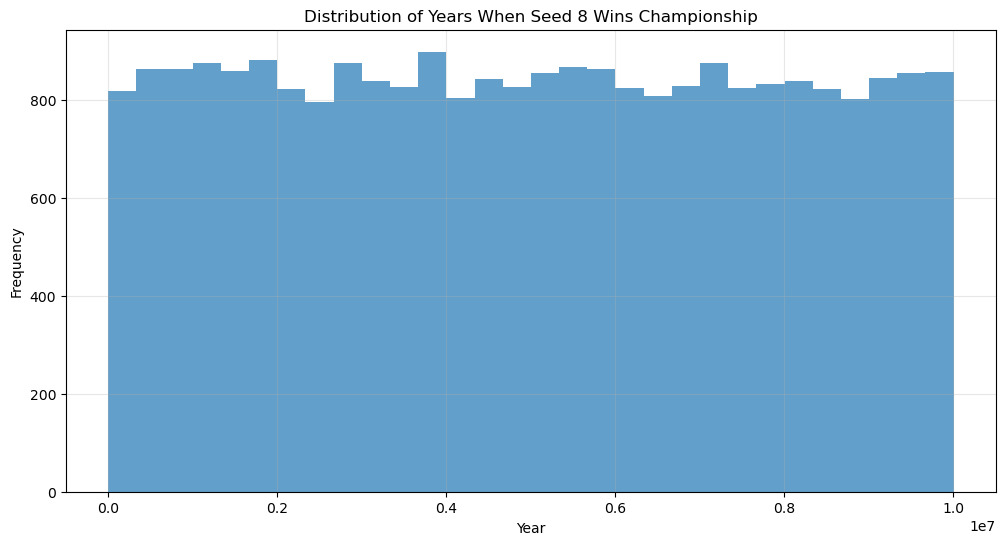

In [92]:
n_years = int(1e7)
start_year = 2025

winning_years = run_simulation(smoothed_probs, hist_dist, seeds, n_years, start_year)
# Convert winning years to a pandas Series for analysis
winning_years_series = pd.Series(winning_years, name="winning_year")

# Calculate the number of simulations that resulted in a win
num_wins = len(winning_years)
print(f"Number of wins: {num_wins}")

# Calculate win probability
win_probability = num_wins / n_years 
print(f"Probability of a win: {win_probability:.4f}")

# If we have wins, calculate statistics about when the next win occurs
if num_wins > 0:
    # Calculate the time until first win (from start_year)
    first_win_year = min(winning_years) if winning_years else None
    years_until_first_win = first_win_year - 2025 if first_win_year else None
    print(f"Years until first win: {years_until_first_win}")
    
    # Calculate the average gap between wins
    if len(winning_years) > 1:
        sorted_years = sorted(winning_years)
        gaps = [sorted_years[i+1] - sorted_years[i] for i in range(len(sorted_years)-1)]
        avg_gap = sum(gaps) / len(gaps)
        print(f"Average gap between wins: {avg_gap:.2f} years")
    
    # Estimate the expected time until next win using geometric distribution
    expected_time = 1 / win_probability if win_probability > 0 else float('inf')
    print(f"Expected time until next win: {expected_time:.2f} years")
    print(f"Expected year of next win: {int(np.floor(start_year + expected_time))}")
    
    # Display distribution of winning years
    plt.figure(figsize=(12, 6))
    plt.hist(winning_years, bins=30, alpha=0.7)
    plt.title('Distribution of Years When Seed 8 Wins Championship')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No wins detected in the simulation.")